# Page Rank Algorithm
## Orders the popularity of web page search results
### First we create a Model for a mini internet which is composed of 4 web pages; A, B, C and D.
### The folowing graph illustrates our model:
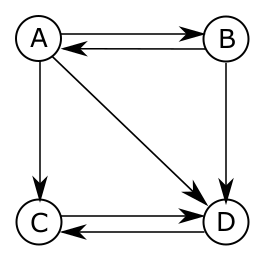
### Each node denotes a webpage, each edge denotes a web link from one page to another.
### So page B conatins two links, one link to A and the other link to D.
### We ignore any self referencing links.
### We consider only direct links, such as A to D, but not A to B to D.

#### To determine the most popular page we set a random selection system.
#### So if a user starts at page A, randomly selects page B, then page A once more, we can represent this as a random page hop.
#### The porbability that a page is accessed at random is guaged and will give a measure of the pages popularity.
#### The links are described as a vector, each with a value of 1 for the presence of a link and 0 for absence of a link.
#### In order that the probability for a page hit we normalise the vectors.

## Link vectors:
### Link vector A
$L_{A}= \begin{bmatrix}
0 & 1 & 1 & 1\\
\end{bmatrix}$
#### Whereby page A has a link to B, C and D.

### Link vector B
$L_{B}= \begin{bmatrix}
1 & 0 & 0 & 1\\
\end{bmatrix}$
#### Whereby page B has a link to A and D.

### Link vectors C and D
$L_{C}= \begin{bmatrix}
0 & 0 & 0 & 1\\
\end{bmatrix}
\\
L_{D}= \begin{bmatrix}
0 & 1 & 1 & 0\\
\end{bmatrix}$

### Normalisation of the vectors involves divion by the sum of the element.
$L_{A}= \begin{bmatrix}
0 & 1 & 1 & 1\\
\end{bmatrix}  =  \begin{bmatrix}
0 & \frac{1}{3} & \frac{1}{3} & \frac{1}{3}\\
\end{bmatrix}
\\
L_{B}= \begin{bmatrix}
1 & 0 & 0 & 1\\
\end{bmatrix}  =\begin{bmatrix} \frac{1}{2} & 0 & 0 & \frac{1}{2}\\
\end{bmatrix}
\\
L_{C}= \begin{bmatrix}
0 & 0 & 0 & 1\\
\end{bmatrix}  =\begin{bmatrix}0 & 0 & 0 & 1\\
\end{bmatrix}
\\
L_{D}= \begin{bmatrix}
0 & 1 & 1 & 0\\
\end{bmatrix}=\begin{bmatrix}0 & \frac{1}{2} & \frac{1}{2} & 0\\
\end{bmatrix}$
\\
#### The normalised vectors are then placed as column in Link matrix:
#### The link matrix L=  $\begin{bmatrix}
0 & \frac{1}{2} & 0 & 0\\
\frac{1}{3} & 0 & 0 & \frac{1}{2}\\
\frac{1}{3} & 0 & 0 & \frac{1}{2}\\
\frac{1}{3} & \frac{1}{2} & 1 & 0\\
\end{bmatrix}$

## Python application
### import numpy and numpy.linalg

In [4]:
#importing libraries
import numpy as np
import numpy.linalg as la

### Build the Link Matrix

In [5]:
# Link Matrix
#Build Link Matrix

L = np.array([[0,   1/2, 0,  0   ],
              [1/3, 0,   0,  1/2 ],
              [1/3, 0,   0,  1/2 ],
              [1/3, 1/2, 1,  0 ]])

#### As an iteration loop will be administered then an initial vector will be required, where each element denotes it's probability of selection first. Four page will mean:
$P(A)=P(B)+P(C)+P(D)=\frac{1}{4}$
#### The initial vector is therefore:
$ \vec{r} = \begin{bmatrix}
\frac{1}{4} & \frac{1}{4} & \frac{1}{4} & \frac{1}{4}\\
\end{bmatrix}$


In [6]:
# Initial vector r,
# Multiplied by 100 in order to gain percentage probabilty
r = 100*np.ones(4)/4   # Set the vector with 4 entries of 1/4 x100 each
r                   

array([25., 25., 25., 25.])

## Rank method.
#### After the first iteration:
 
$\begin{pmatrix}% 
0&\frac{1}{2}&0&0\\% 
\frac{1}{3}&0&0&\frac{1}{2}\\% 
\frac{1}{3}&0&0&\frac{1}{2}\\%
\frac{1}{2}&\frac{1}{2}&1&0%
\end{pmatrix} \begin{pmatrix}% 
\frac{1}{4}\\% 
\frac{1}{4}\\% 
\frac{1}{4}\\
\frac{1}{4}% 
\end{pmatrix} = \begin{pmatrix}% 
\frac{1}{4}(\frac{1}{2})=\frac{1}{8}\\% 
\frac{1}{4}(\frac{1}{3}+\frac{1}{2})=\frac{5}{24}\\%
\frac{1}{4}(\frac{1}{3}+\frac{1}{2})=\frac{5}{24}\\%
\frac{1}{4}(\frac{1}{3}+\frac{1}{2}+1)=\frac{11}{24}\\%
% 
\end{pmatrix}
$

### So, 
$R_{A} \approx 0.125
\\
R_{B} \approx 0.208
\\
R_{C} \approx 0.208
\\
R_{D} \approx 0.458$

In [7]:
# Performing the first iteration, multiply matrix L with vector r
r = L @ r  # applies link matrix to r
r #this is the rank vector after first iteration

array([12.5       , 20.83333333, 20.83333333, 45.83333333])

### The process is repeated until a stable result is found.
#### Essentially the following summation is employed:
$
R_{A} = \sum_{j=1}^{n}  L_{a}jM_{j}\   
\\
\\
n\in \mathbb{N}
$
#### Where j is the number of webpages and n is number of iterations

#### The rank of A is the sum of the ranks of all the pages which are liked to it, weighted by their specific link probability taken from the matrix L.
$
M=L \cdot r
$

#### By iteration: 
#### Initial step:             $r^{i}=L\cdot r$
#### Subsequently:       $r^{i+1}=L\cdot r^{i}$

#### Since $L\vec{x}=\lambda\vec{x}$
#### So, $\lambda = r$, which is the eigenvalue of 1
#### And $\vec{r}$ is the eigenvector of matrix L.


In [16]:
# To update the value of r, keep repeating 
r = L @ r 
r

array([10.41666667, 27.08333333, 27.08333333, 35.41666667])

## While loop.
### Introduce a while loop to iterate 100 times

In [10]:
# We repeat using a loop
r=100*np.ones(4)/4
for i in np.arange(100):
    r=L@r
r

array([11.99986288, 24.00024908, 24.00024908, 39.99963896])

#### The final iteration of r denotes the probabilty of hitting each page during the 100 cloop experiment.
#### The user spends 12% in page A, 24% in page B and 24% in C, then 40% in D

In [18]:
# Best Probabilty:
round(np.max(r),2)

40.0

### Running the while loop until a a specific condition is met, such as a tolerance level

In [19]:
# We may run the code until a specific condition is met, such as tolerance
r =  100*np.ones(4)/4
lastR = r  #set to equal initial r
r = L@r
i = 0      # counting variable
while la.norm(lastR - r)> 0.01:
    lastR = r
    r = L@r
    i += 1
    print(r)
print(str(i)+" is number of iterations for convergence")
r

[10.41666667 27.08333333 27.08333333 35.41666667]
[13.54166667 21.18055556 21.18055556 44.09722222]
[10.59027778 26.5625     26.5625     36.28472222]
[13.28125    21.6724537  21.6724537  43.37384259]
[10.83622685 26.11400463 26.11400463 36.93576389]
[13.05700231 22.07995756 22.07995756 42.78308256]
[11.03997878 25.74387539 25.74387539 37.47227045]
[12.87193769 22.41612815 22.41612815 42.29580601]
[11.20806408 25.4385489  25.4385489  37.91483812]
[12.71927445 22.69344042 22.69344042 41.89384471]
[11.34672021 25.1866805  25.1866805  38.27991878]
[12.59334025 22.92219946 22.92219946 41.56226083]
[11.46109973 24.9789105  24.9789105  38.58107927]
[12.48945525 23.11090621 23.11090621 41.28873232]
[11.55545311 24.80751791 24.80751791 38.82951107]
[12.40375896 23.26657324 23.26657324 41.06309457]
[11.63328662 24.6661336  24.6661336  39.03444618]
[12.3330668  23.39498529 23.39498529 40.87696261]
[11.69749265 24.54950357 24.54950357 39.20350021]
[12.27475179 23.50091432 23.50091432 40.72341957]


array([11.99886079, 24.00206936, 24.00206936, 39.99700048])

### We find:
$P(A) = 11.99\approx12\%
\\
P(B) = 24.00\approx24\%
\\
P(C) = 24.00\approx24\%
\\
P(D) = 39.997\approx40\%
$

In [34]:
#Lets take a new case with 6 pages

M = np.array([[0,   1/2, 1/3, 0, 0,    0 ],
              [1/3, 0,   0,   0, 1/2, 1/3],
              [1/3, 1/2, 0,   1, 0,   0 ],
              [1/3, 0,   1/3, 0, 1/2, 1/3 ],
              [0,   0,   0,   0, 0,   1/3 ],
              [0,   0,   1/3, 0, 0,   0 ]])
M

array([[0.        , 0.5       , 0.33333333, 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , 0.        , 0.5       ,
        0.33333333],
       [0.33333333, 0.5       , 0.        , 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.5       ,
        0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.        ]])

In [35]:
r=100*np.ones(6)/6
lastR = r
r =M@r
i =0
while la.norm(lastR - r)>0.01:
    lastR = r
    r= M@r
    i +=1
    print(r)
print(str(i) + "iterations for convergence to give vector r")
r

[19.90740741  9.25925926 39.35185185 19.44444444  1.85185185 10.18518519]
[17.74691358 10.95679012 30.70987654 24.07407407  3.39506173 13.11728395]
[15.71502058 11.98559671 35.468107   22.22222222  4.37242798 10.23662551]
[17.81550069 10.83676269 33.45336077 22.65946502  3.4122085  11.82270233]
[16.5695016  11.58550526 34.01634659 22.73662551  3.94090078 11.15112026]
[17.13153483 11.21065767 34.05254534 22.54943987  3.71704009 11.3387822 ]
[16.95617728 11.34862572 33.86528032 22.69947417  3.77959407 11.35084845]
[16.96273963 11.32547228 34.02584612 22.61389905  3.78361615 11.28842677]
[17.00468485 11.30886354 33.93088173 22.65081225  3.76280892 11.34194871]
[16.96472568 11.33028231 33.9734723  22.64057622  3.78064957 11.31029391]
[16.98963192 11.31533132 33.96062594 22.63982208  3.77009797 11.32449077]
[16.9778743  11.32308988 33.96069838 22.64329853  3.77483026 11.32020865]
[16.98177773 11.32010945 33.9641349  22.64034224  3.77340288 11.32023279]
13iterations for convergence to give v

array([16.98177773, 11.32010945, 33.9641349 , 22.64034224,  3.77340288,
       11.32023279])

In [86]:
# A=17%, B=11%,C=34%,D=22%,E=4%,F=11%
m=round(max(r),1)
print("maximum % is "+str(m)+" %")

maximum % is 34.0 %


In [87]:
r[0:6]  

array([16.98177773, 11.32010945, 33.9641349 , 22.64034224,  3.77340288,
       11.32023279])

In [92]:
toppage=np.where(r==max(r))
top =str(toppage)
print("Page number {} with {}% hit pobability".format(top,m))


Page number (array([2], dtype=int64),) with 34.0% hit pobability


In [78]:
thisdict = {
  "1": "A",
  "2": "B",
  "3": "C"
}
print(thisdict["1"])


A
